<left>Correlation One DS4A/W </left>
<br>
<h3>Team - 3</h3>
<h3>TA - Oretha Domfeh</h3>

<h2><center> Exploratory Data Analysis </center></h2>

<center> Amber Lee </center>
<center> Cindy Zhang </center>
<center> Hejia Zhang </center>
<center> Wafer Hsu </center>
<br>

<center>Monday, Jul 24</center>

In [9]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.dates as mdates

In [3]:
stocks = pd.read_csv('stocks_filtered.csv')
stocks['date'] = pd.to_datetime(stocks['date'])
stocks = stocks.set_index('date')

In [4]:
stocks.sort_values('date')

,ticker,adj_close
date,,
2017-12-01,GOOG,50.508500
2017-12-01,AMZN,57.977862
2017-12-01,AAPL,40.542754
2017-12-01,NVDA,48.957940
2017-12-01,MSFT,79.231484
...,...,...
2023-06-30,MSFT,340.540000
2023-06-30,AMZN,130.360000
2023-06-30,NVDA,423.020000


## 1. Time Series of Stock Prices

In [4]:
stocks_pivot = pd.pivot_table(stocks, index = stocks.index,
                              columns = "ticker", values = "adj_close")

stocks_pivot.isna().sum()

ticker
AAPL    0
AMZN    0
GOOG    0
MSFT    0
NVDA    0
dtype: int64

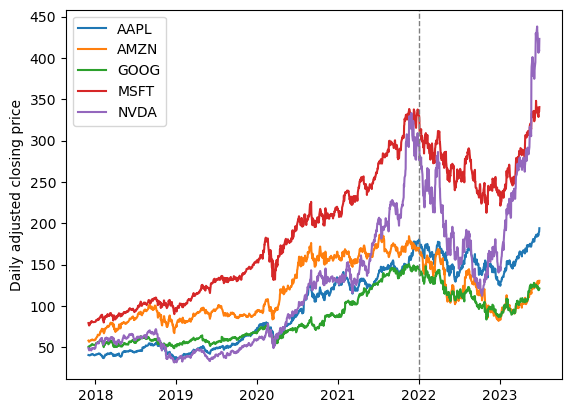

In [5]:
for ticker in stocks_pivot.columns:
    plt.plot(stocks_pivot.index, stocks_pivot[ticker], label = ticker)

plt.axvline(x=pd.to_datetime('2022-01-01'), color='gray', lw=1, ls="--")
plt.legend(loc="upper left")

plt.ylabel('Daily adjusted closing price')

plt.savefig('timeseries.png')

## 2. Auto- and Partial Auto-correlation

/Users/amberlee/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


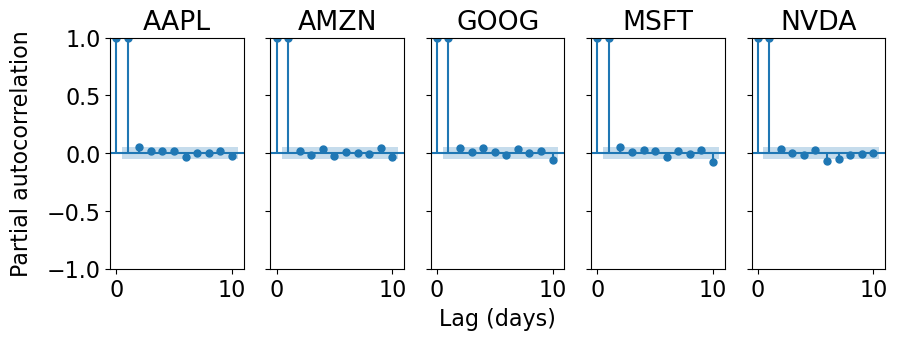

In [6]:
import statsmodels.api as sm
import matplotlib as mpl

mpl.rcParams["font.size"] = 16


fig, ax = plt.subplots(1, 5, figsize=(10,3), 
                       sharex=True, sharey=True)

for ticker,i in zip(stocks_pivot.columns, range(5)):
    
    sm.graphics.tsa.plot_pacf(stocks_pivot[ticker],lags=10, ax=ax[i])
    ax[i].set_title(ticker)

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)



plt.ylabel('Partial autocorrelation\n')
plt.xlabel('Lag (days)')


plt.savefig('PACF.png')

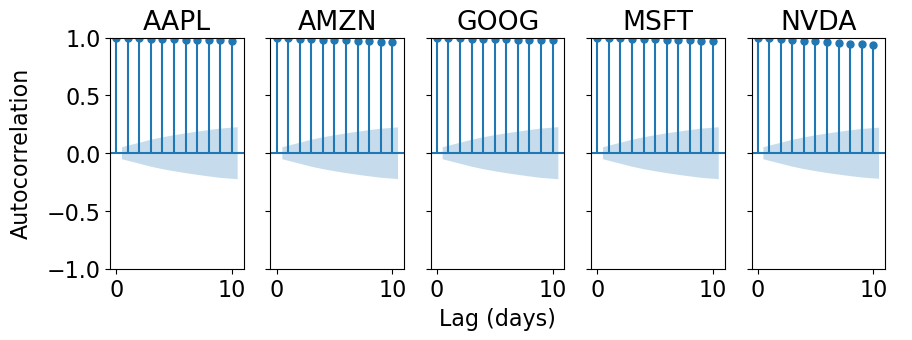

In [7]:
fig, ax = plt.subplots(1, 5, figsize=(10,3), 
                       sharex=True, sharey=True)

for ticker,i in zip(stocks_pivot.columns, range(5)):
    
    sm.graphics.tsa.plot_acf(stocks_pivot[ticker],lags=10, ax=ax[i])
    ax[i].set_title(ticker)

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)



plt.ylabel('Autocorrelation\n')
plt.xlabel('Lag (days)')

plt.savefig('ACF.png')

## 3. Sentiment Analysis

In [8]:
sentiment = pd.read_csv('daily_sentiment.csv')
sentiment['date'] = pd.to_datetime(sentiment['date'])

# lets aggregate across month
sentiment['date'] = sentiment['date'].apply(lambda ts: ts.replace(day=1))

monthly_sentiment = sentiment.drop(columns=['neg', 'neu', 'pos']).groupby(
    ['date', 'ticker']
).agg({'compound' : 'mean',
       'volume' : 'sum'}).reset_index().set_index('date')

In [9]:
monthly_compound = pd.pivot_table(monthly_sentiment, index = monthly_sentiment.index,
               columns = "ticker", values = "compound")

monthly_vol = pd.pivot_table(monthly_sentiment, index = monthly_sentiment.index,
               columns = "ticker", values = "volume")

# remove july 2023 because not representative
monthly_compound = monthly_compound[:-1]
monthly_vol = monthly_vol[:-1]


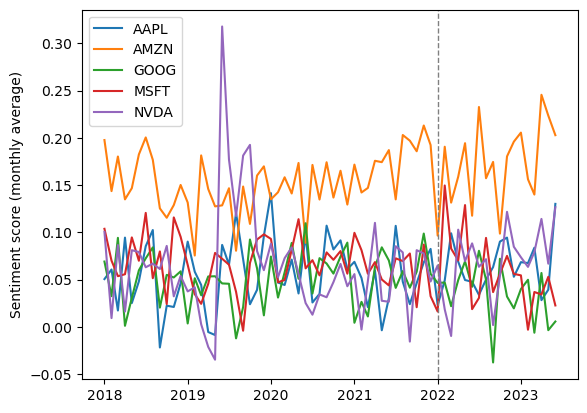

In [10]:
mpl.rcParams["font.size"] = 10


for ticker in monthly_compound.columns:
    plt.plot(monthly_compound.index, monthly_compound[ticker], label = ticker)

plt.axvline(x=pd.to_datetime('2022-01-01'), color='gray', lw=1, ls="--")
plt.legend(loc="upper left")

plt.ylabel('Sentiment score (monthly average)')

plt.savefig('monthlysentiment.png')

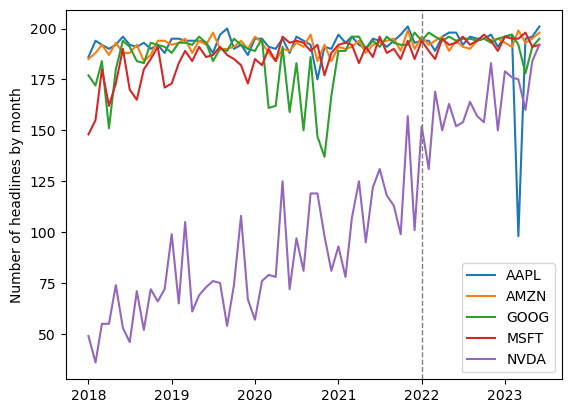

In [11]:
for ticker in monthly_vol.columns:
    plt.plot(monthly_vol.index, monthly_vol[ticker], label = ticker)

plt.axvline(x=pd.to_datetime('2022-01-01'), color='gray', lw=1, ls="--")
plt.legend(loc="lower right")

plt.ylabel('Number of headlines by month')

plt.savefig('monthlyvol.png')

In [12]:
monthly_compound

ticker,AAPL,AMZN,GOOG,MSFT,NVDA
date,,,,,
2018-01-01,0.050525,0.197604,0.069083,0.103705,0.100452
2018-02-01,0.060657,0.143608,0.032447,0.070039,0.009267
2018-03-01,0.017292,0.180219,0.094147,0.053611,0.086505
2018-04-01,0.094396,0.134861,0.001120,0.055652,0.016178
2018-05-01,0.025155,0.146663,0.030604,0.094614,0.081101
...,...,...,...,...,...
2023-02-01,0.067452,0.156093,0.049806,-0.003014,0.063439
2023-03-01,0.083727,0.139943,-0.006206,0.036877,0.079033
2023-04-01,0.028234,0.245505,0.056974,0.034201,0.114199


In [13]:
sentiment = sentiment.set_index('date')

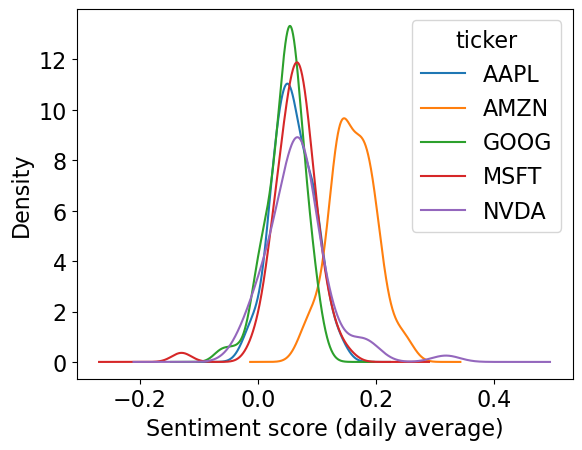

In [17]:
mpl.rcParams["font.size"] = 16

pd.pivot_table(sentiment, index=sentiment.index,
               columns='ticker', values='compound').plot(kind='density')

plt.xlabel('Sentiment score (daily average)')

plt.savefig('sentimentdist.png', bbox_inches="tight")

In [44]:
from scipy.stats import gaussian_kde
import matplotlib.dates as mdates

import matplotlib.patches as mpatches

tickers = ['AAPL', 'AMZN', 'GOOG', 'MSFT', 'NVDA']

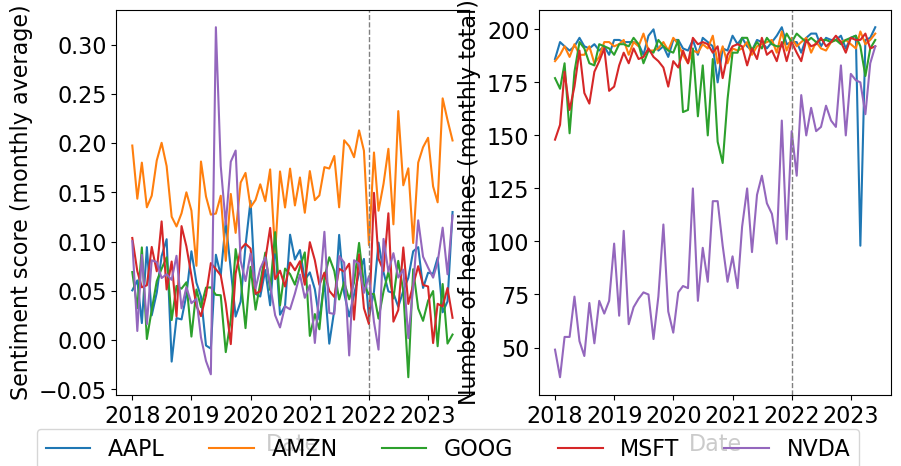

In [26]:
mpl.rcParams["font.size"] = 16


fix, ax = plt.subplots(1, 2, figsize=(10,5), sharex=True)

for ticker in monthly_compound.columns:
    ax[0].plot(monthly_compound.index, monthly_compound[ticker], label = ticker)

ax[0].axvline(x=pd.to_datetime('2022-01-01'), color='gray', lw=1, ls="--")
ax[0].set(ylabel="Sentiment score (monthly average)", xlabel='Date')

for ticker in monthly_vol.columns:
    ax[1].plot(monthly_vol.index, monthly_vol[ticker], label = ticker)

ax[1].axvline(x=pd.to_datetime('2022-01-01'), color='gray', lw=1, ls="--")
ax[1].set(ylabel="Number of headlines (monthly total)", xlabel='Date')


ax[1].legend(tickers, loc='lower center', bbox_to_anchor=(0.7,-0.03), 
           ncol=5, bbox_transform=fig.transFigure)

plt.savefig('sentiment_timeseries.png', bbox_inches="tight")

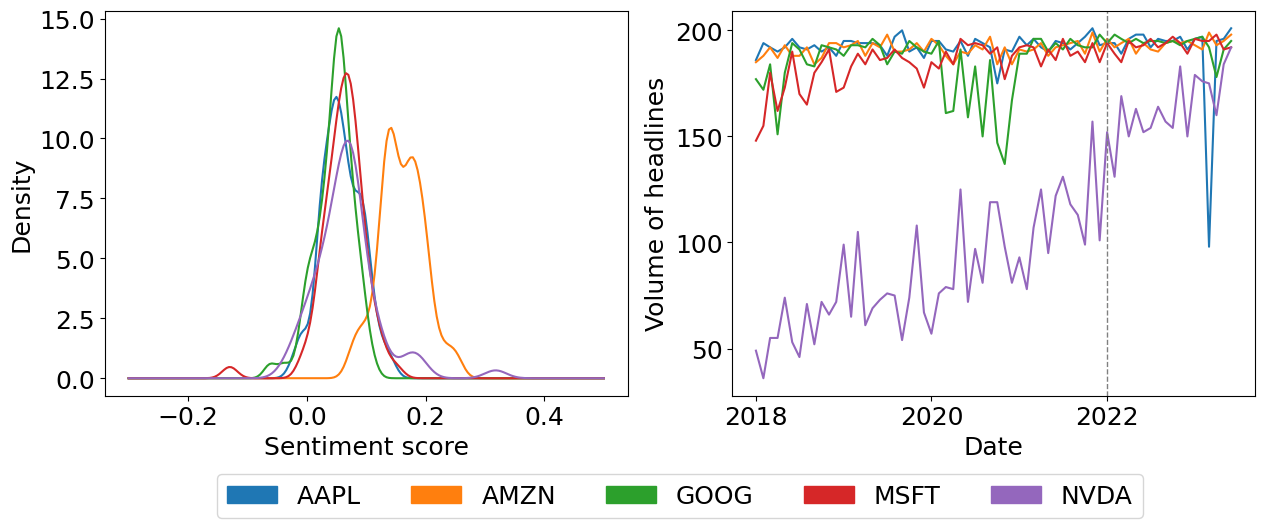

In [80]:
mpl.rcParams["font.size"] = 18

fig, ax = plt.subplots(1, 2, figsize=(4, 5))
plt.subplots_adjust(right=3)


sentiment_pivot = pd.pivot_table(sentiment, index=sentiment.index,
               columns='ticker', values='compound')

for ticker in sentiment_pivot.columns:
    density = gaussian_kde(sentiment_pivot[ticker])
    xs = np.linspace(-0.3,0.5,200)
    density.covariance_factor = lambda : .33
    density._compute_covariance()
    ax[0].plot(xs, density(xs))

    
ax[0].set(xlabel='Sentiment score', ylabel='Density')

for ticker in monthly_vol.columns:
    ax[1].plot(monthly_vol.index, monthly_vol[ticker], label = ticker)

ax[1].axvline(x=pd.to_datetime('2022-01-01'), color='gray', lw=1, ls="--")
ax[1].set(ylabel="Volume of headlines", xlabel='Date')
ax[1].xaxis.set_major_locator(mdates.YearLocator(2))

patches = [mpatches.Patch(color="C" + str(k), 
                          label=ticker) for (ticker, k) in zip(tickers,range(5))]
plt.legend(patches, tickers, loc='lower center',
           bbox_to_anchor=(-.10, -0.35), ncol=5)


plt.savefig('sentimenteda.png', bbox_inches='tight')


## 4. Missing Values

In [6]:
sentiment = pd.read_csv('daily_sentiment.csv')
sentiment['date'] = pd.to_datetime(sentiment['date'])
stock_universe = pd.read_pickle('stock_universe.pkl')
stocks = stock_universe[stock_universe.ticker.isin(['AMZN', 'AAPL', 'GOOG', 'MSFT','NVDA'])]
stocks.reset_index(drop = True, inplace = True)

In [7]:
df = stocks.merge(sentiment, how = 'outer',
                  left_on = ['date','ticker'],
                  right_on = ['date','ticker']).sort_values(by= ['ticker','date']).reset_index(drop = True)
df.sort_values(by= ['ticker','date'])

,ticker,date,adj_close,adj_volume,return,Mkt-RF_beta,SMB_beta,HML_beta,RMW_beta,CMA_beta,compound,neg,neu,pos,volume
0,AAPL,2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.255300,0.000000,0.854000,0.146000,2.0
1,AAPL,2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.064093,0.093143,0.815571,0.091286,14.0
2,AAPL,2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.048510,0.066100,0.894500,0.039400,10.0
3,AAPL,2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.173443,0.053857,0.784000,0.162143,7.0
4,AAPL,2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008500,0.068000,0.854200,0.078000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,NVDA,2023-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.024525,0.028875,0.946125,0.025000,8.0
9461,NVDA,2023-06-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.170586,0.024643,0.853214,0.122143,14.0
9462,NVDA,2023-06-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.189127,0.097545,0.902455,0.000000,11.0
9463,NVDA,2023-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.121033,0.027222,0.888333,0.084444,9.0


After merging the stock data and related sentimental analysis, we can see a lot of missing values. This is because the stock market is closed on weekends and holidays, while the news is still being reported.

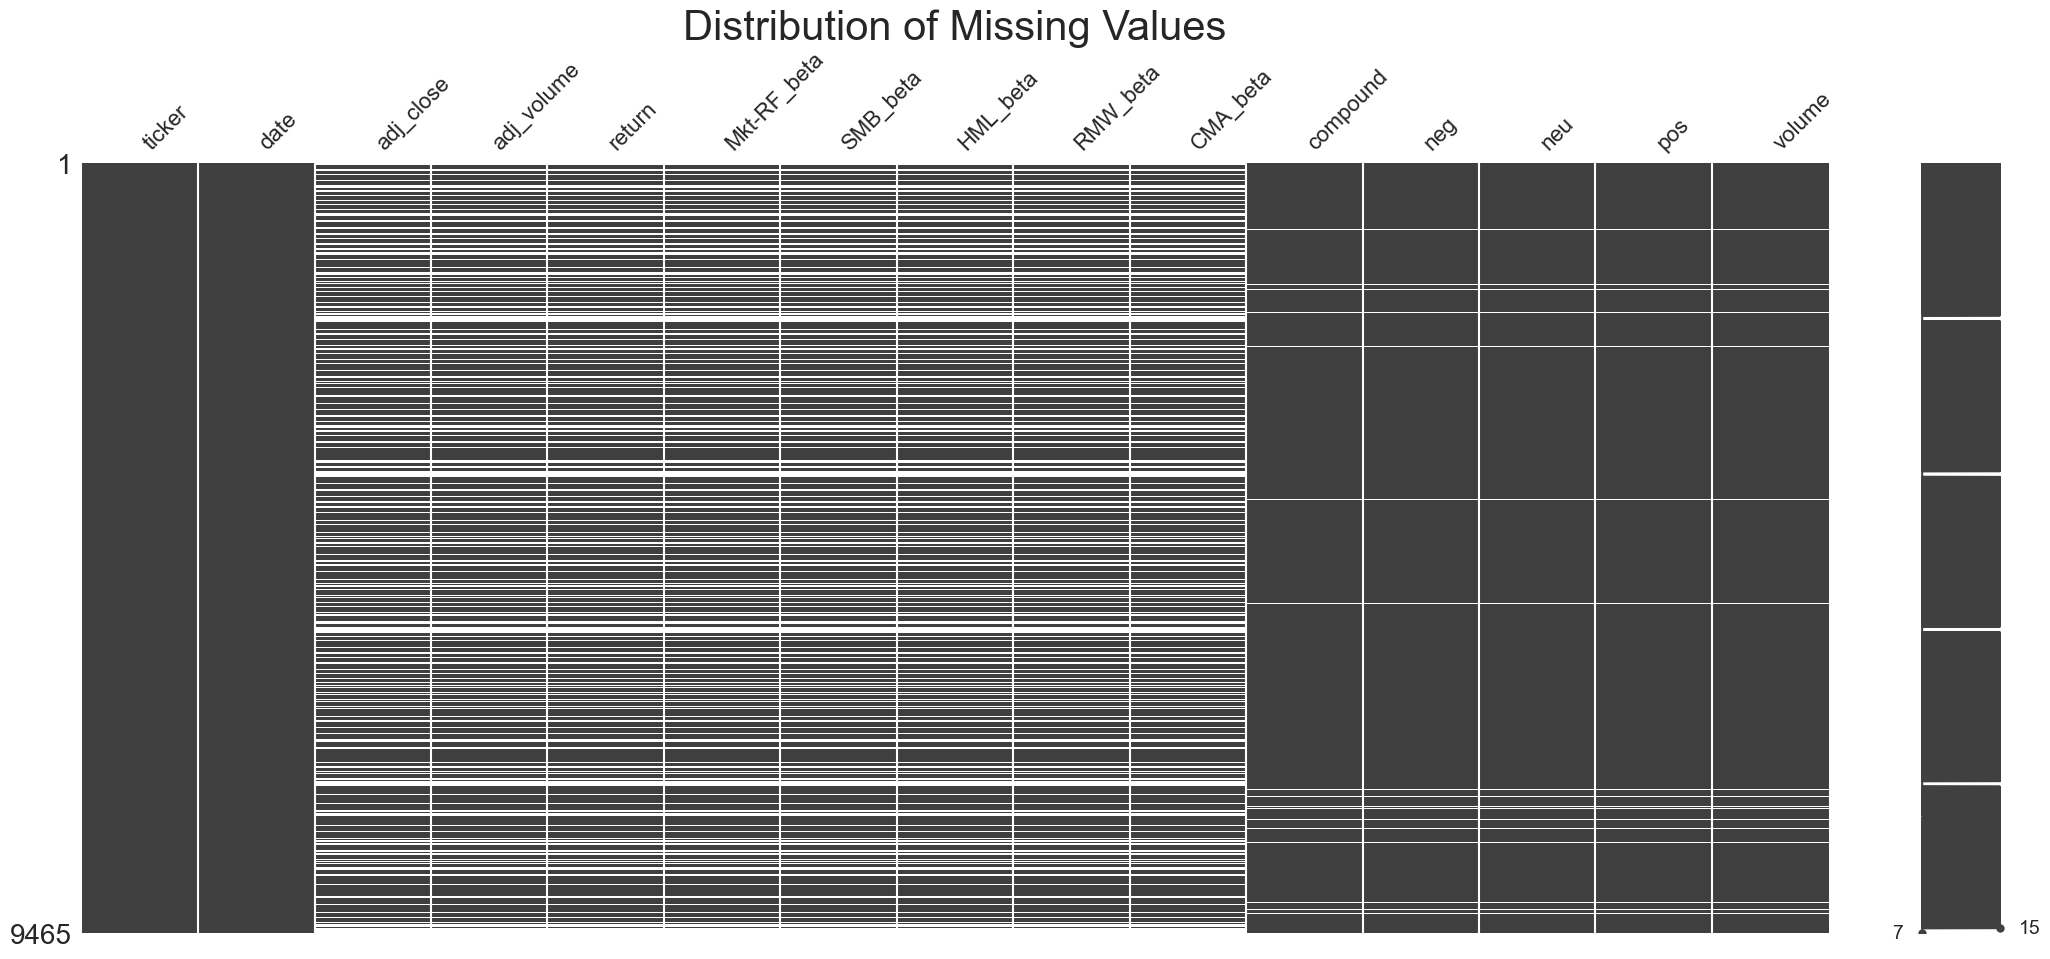

In [10]:
msno.matrix(df)
plt.title("Distribution of Missing Values", fontsize = 30)
None

Upon visualizing the missing values, it becomes evident that most of the gaps occur in stock data during weekends and holidays. Occasional missing values are also observed in news data. This implies that even though we have selected the most frequent and hot-spot companies, some firms' news might not be reported on certain days.

Nevertheless, since the market is closed during weekends and holidays, stock prices remain unchanged. In other words, all stock price information available to investors for analysis or speculation is from previous trading days. Consequently, we can utilize the stock price from the previous trading day to fill in the missing stock prices.

As for the news data, we can adopt a similar approach and use the previous day's news data to fill in the gaps while setting the volume to 0. Typically, the news sentiment from the previous day tends to be similar to that of the current day. Although sentiment may gradually become neutral over time, given the rarity of missing values, we can simplify the process by using the previous sentiment as a reliable proxy.

In [11]:
df.iloc[:,2:14] = df.iloc[:,2:14].fillna(method = 'ffill')
df.iloc[15] = df.iloc[15].fillna(0)
df = df.dropna()
df

,ticker,date,adj_close,adj_volume,return,Mkt-RF_beta,SMB_beta,HML_beta,RMW_beta,CMA_beta,compound,neg,neu,pos,volume
8,AAPL,2018-01-09,41.320189,86335988.0,-0.000115,0.008756,-0.001232,-0.004926,-0.007597,-0.011452,-0.108533,0.081889,0.898222,0.019889,9.0
9,AAPL,2018-01-10,41.310708,95839580.0,-0.000229,0.008775,-0.001056,-0.005217,-0.007099,-0.011424,0.026117,0.103500,0.791167,0.105333,6.0
10,AAPL,2018-01-11,41.545360,74670916.0,0.005680,0.007868,-0.000869,-0.005472,-0.007063,-0.011407,-0.053582,0.064909,0.872909,0.062182,11.0
11,AAPL,2018-01-12,41.974372,101672320.0,0.010326,0.007796,-0.000790,-0.005381,-0.007251,-0.011504,0.051225,0.069750,0.855125,0.075125,8.0
12,AAPL,2018-01-14,41.974372,101672320.0,0.010326,0.007796,-0.000790,-0.005381,-0.007251,-0.011504,-0.204700,0.110500,0.889500,0.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,NVDA,2023-06-26,277.460384,29107979.0,0.019210,0.010289,-0.006635,0.002520,-0.001970,-0.029676,-0.024525,0.028875,0.946125,0.025000,8.0
9461,NVDA,2023-06-27,277.460384,29107979.0,0.019210,0.010289,-0.006635,0.002520,-0.001970,-0.029676,0.170586,0.024643,0.853214,0.122143,14.0
9462,NVDA,2023-06-28,277.460384,29107979.0,0.019210,0.010289,-0.006635,0.002520,-0.001970,-0.029676,-0.189127,0.097545,0.902455,0.000000,11.0
9463,NVDA,2023-06-29,277.460384,29107979.0,0.019210,0.010289,-0.006635,0.002520,-0.001970,-0.029676,0.121033,0.027222,0.888333,0.084444,9.0


## 5. Summary Statistics and Correlation Test

In [12]:
summary_stats = df.describe()
summary_stats

,adj_close,adj_volume,return,Mkt-RF_beta,SMB_beta,HML_beta,RMW_beta,CMA_beta,compound,neg,neu,pos,volume
count,9258.000000,9.258000e+03,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000
mean,126.997332,6.234553e+07,0.000692,0.011959,-0.002722,-0.003428,0.001805,-0.007368,0.079193,0.048876,0.845510,0.105615,6.147332
std,68.664335,4.821300e+07,0.023408,0.003057,0.003731,0.003868,0.005400,0.011889,0.170526,0.058267,0.101017,0.086152,3.947328
min,31.528513,6.935060e+06,-0.187559,0.000383,-0.016177,-0.019271,-0.020649,-0.045892,-0.824000,0.000000,0.303000,0.000000,1.000000
25%,72.866543,2.841904e+07,-0.010476,0.010209,-0.005165,-0.005720,-0.001219,-0.013786,0.000000,0.000000,0.783446,0.041571,3.000000
50%,112.799000,4.787815e+07,0.001051,0.011755,-0.002865,-0.003108,0.002206,-0.008551,0.070094,0.036000,0.856400,0.091950,6.000000
75%,160.193679,8.028166e+07,0.012172,0.013359,-0.000543,-0.000850,0.004958,-0.000855,0.172380,0.073229,0.914729,0.159000,9.000000
max,338.297561,4.184741e+08,0.171564,0.023148,0.009848,0.009202,0.023862,0.028699,0.942300,0.576000,1.000000,0.667000,39.000000


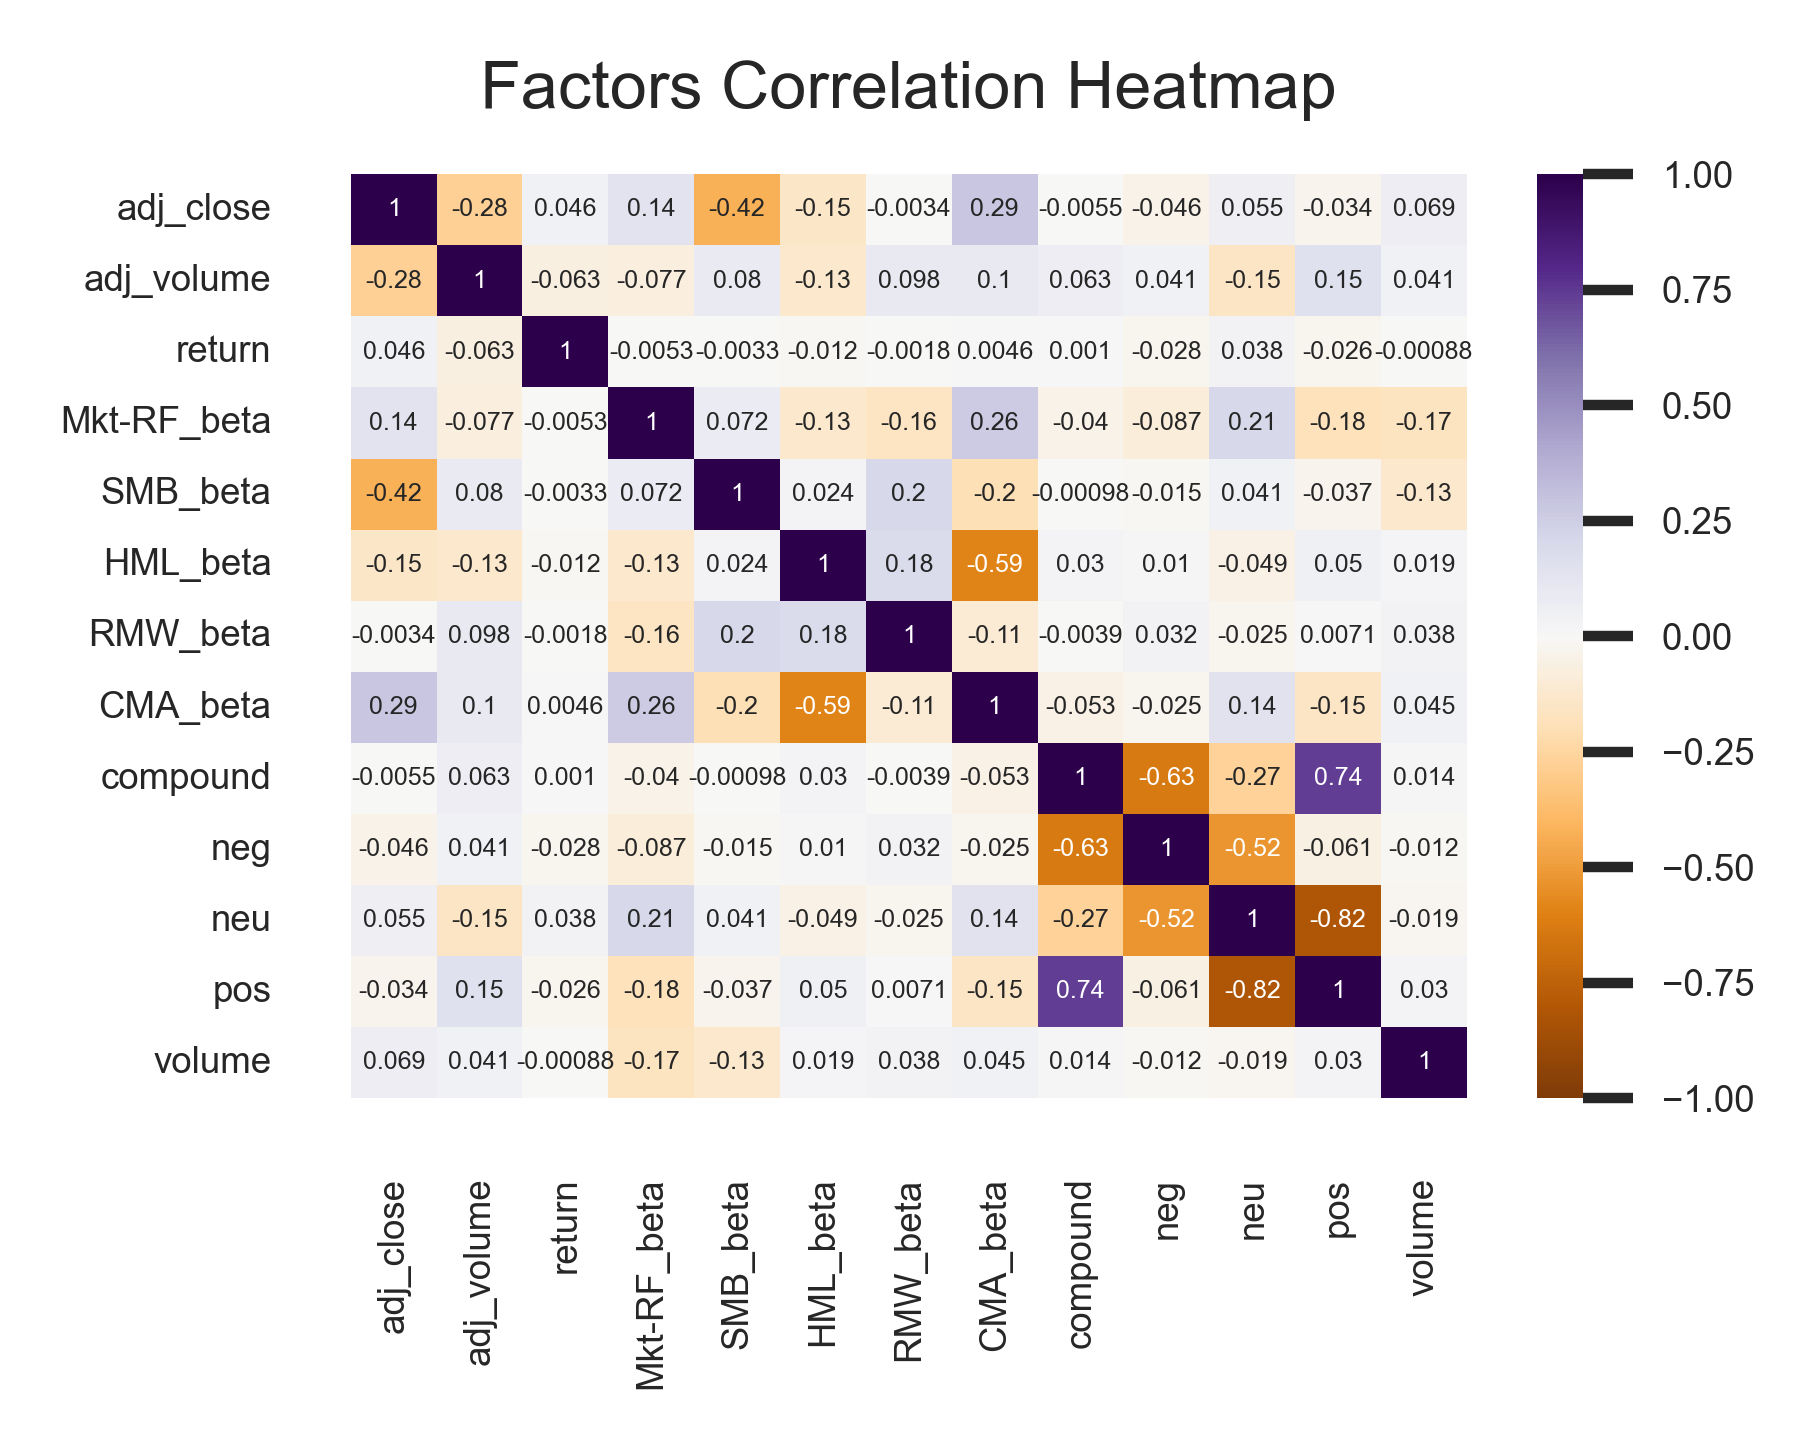

In [13]:
plt.figure(figsize=(3,2),dpi=600)
sns.set(font_scale=0.4)
heatmap = sns.heatmap(df.corr(), cmap="PuOr",vmin=-1, vmax=1, annot=True,annot_kws={"size": 3})
heatmap.set_title('Factors Correlation Heatmap', fontdict={'fontsize':8}, pad=8);

The correlation heatmap reveals a notable negative correlation between CMA beta and HML beta, raising concerns about potential collinearity in our future model. Interestingly, the heatmap also shows a correlation between neutral sentiment and market beta, indicating that the excess return of the equity is more likely to increase when the news sentiment is neutral. This return is defined by the risk premium of the equity itself.

Given that most factors exhibit low correlation, it seems reasonable to begin with a linear regression model. Notably, all betas are calculated based on the past 100 days, excluding today's closing price, while the news sentiment is available at the end of each day. This contemporaneous nature allows us to use a model to predict the return of the next day.

In [ ]:
df.to_csv('combined_data.csv')